<a href="https://colab.research.google.com/github/yjjw/Video-Compression/blob/master/Video_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Model
import keras.layers as Layers
from keras.layers import Input, MaxPooling2D, Conv2D, Conv2DTranspose, BatchNormalization
import cv2
import math

Using TensorFlow backend.


In [0]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!unzip -q "/content/drive/My Drive/RaceHorses_416x240_30.zip"

In [0]:
!unzip -q "/content/drive/My Drive/BlowingBubbles_416x240_50.zip"

In [0]:
comp_ratio_psnr = [] # store psnr values for different compression ratios

In [0]:

images = []
filename = 'BlowingBubbles_416x240_50/'

for i in range(500):
  im = cv2.imread(filename + str(i) + '.png')
  images.append(im)
'''
for i in range(300):
    im = Image.open(filename + str(i) + '.png')
    width = im.width
    height = im.height
    pix_val = im.getdata()  # extract (R,G,B,A) values to a list
    pix_val = [pixels[0:3] for pixels in pix_val]  # remove alpha channel
    pix_val = np.asarray(pix_val).reshape(width, height, 3)
    images.append(pix_val)
'''
images = np.asarray(images)
images = images / 255.0 # normalize
print('the shape of training images is', images.shape)



the shape of training images is (500, 240, 416, 3)


In [0]:
print(images[0].shape)

(240, 416, 3)


In [0]:
test_images = []
filename = 'RaceHorses_416x240_30/'
for i in range(300):
  im = cv2.imread(filename + str(i) + '.png')
  test_images.append(im)
'''
for i in range(300):
    im = Image.open(filename + str(i) + '.png')
    width = im.width
    height = im.height
    pix_val = im.getdata()  # extract (R,G,B,A) values to a list
    pix_val = [pixels[0:3] for pixels in pix_val]  # remove alpha channel
    pix_val = np.asarray(pix_val).reshape(height, width, 3)
    test_images.append(pix_val)
'''
test_images = np.asarray(test_images)
test_images = test_images / 255.0 #normalize
print('the shape of testing images is', test_images.shape)


the shape of testing images is (300, 240, 416, 3)


In [0]:
'''
input_layer = Input(shape=images[0].shape)
c1 = Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same', strides=(1, 1))(input_layer)
I1 = MaxPooling2D(strides=(2, 2))(c1)
c2 = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same', strides=(1, 1))(I1)
I2 = MaxPooling2D(strides=(2, 2))(c2)
c3 = Conv2D(filters=16, kernel_size=(1, 1), activation='relu', padding='same', strides=(1, 1))(I2)
c4 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1))(c3)
o = Layers.concatenate([c3,c4], axis = 3) # inception modules
o = Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1))(o) # filters = [24,12,6,3] for compression ratio of [1/2,1/4,1/8,1/16]

d = Conv2DTranspose(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1))(o)
p1 = Conv2DTranspose(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1))(d)
p2 = Conv2DTranspose(filters=16, kernel_size=(1, 1), activation='relu', padding='same', strides=(1, 1))(d)
d = Layers.concatenate([p1,p2], axis = 3) # inception modules
d = Conv2DTranspose(filters=32, kernel_size=(5, 5), activation='relu', padding='same', strides=(2, 2))(d)
d = Conv2DTranspose(filters=3, kernel_size=(7,7), activation='relu', padding='same', strides=(2, 2))(d)
'''


# for compression ratio of 1/32
input_layer = Input(shape=images[0].shape)
c1 = Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same', strides=(1, 1))(input_layer)
I1 = MaxPooling2D(strides=(2, 2))(c1)
c2 = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same', strides=(1, 1))(I1)
I2 = MaxPooling2D(strides=(2, 2))(c2)
c3 = Conv2D(filters=16, kernel_size=(1, 1), activation='relu', padding='same', strides=(1, 1))(I2)
c4 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1))(c3)
o = Layers.concatenate([c3,c4], axis = 3) # inception modules
o = MaxPooling2D(strides=(2, 2))(o)
o = Conv2D(filters=6, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1))(o) 

d = Conv2DTranspose(filters=6, kernel_size=(3, 3), activation='relu', padding='same', strides=(2, 2))(o)
p1 = Conv2DTranspose(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1))(d)
p2 = Conv2DTranspose(filters=16, kernel_size=(1, 1), activation='relu', padding='same', strides=(1, 1))(d)
d = Layers.concatenate([p1,p2], axis = 3) # inception modules
d = Conv2DTranspose(filters=32, kernel_size=(5, 5), activation='relu', padding='same', strides=(2, 2))(d)
d = Conv2DTranspose(filters=3, kernel_size=(7,7), activation='relu', padding='same', strides=(2, 2))(d)


In [0]:
model = Model(input_layer, d)
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 240, 416, 3)  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 240, 416, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 120, 208, 64) 0           conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 120, 208, 32) 51232       max_pooling2d_7[0][0]            
____________________________________________________________________________________________

In [0]:
model.fit(images, images, batch_size=32, epochs=360, verbose=2)

Epoch 1/360
 - 4s - loss: 0.1015 - acc: 0.4659
Epoch 2/360
 - 3s - loss: 0.0275 - acc: 0.9222
Epoch 3/360
 - 3s - loss: 0.0220 - acc: 0.9510
Epoch 4/360
 - 3s - loss: 0.0193 - acc: 0.9512
Epoch 5/360
 - 3s - loss: 0.0176 - acc: 0.9512
Epoch 6/360
 - 3s - loss: 0.0166 - acc: 0.9512
Epoch 7/360
 - 3s - loss: 0.0159 - acc: 0.9512
Epoch 8/360
 - 3s - loss: 0.0153 - acc: 0.9512
Epoch 9/360
 - 3s - loss: 0.0148 - acc: 0.9512
Epoch 10/360
 - 3s - loss: 0.0144 - acc: 0.9512
Epoch 11/360
 - 3s - loss: 0.0142 - acc: 0.9512
Epoch 12/360
 - 3s - loss: 0.0141 - acc: 0.9512
Epoch 13/360
 - 3s - loss: 0.0139 - acc: 0.9512
Epoch 14/360
 - 3s - loss: 0.0138 - acc: 0.9512
Epoch 15/360
 - 3s - loss: 0.0138 - acc: 0.9512
Epoch 16/360
 - 3s - loss: 0.0136 - acc: 0.9512
Epoch 17/360
 - 3s - loss: 0.0135 - acc: 0.9512
Epoch 18/360
 - 3s - loss: 0.0134 - acc: 0.9512
Epoch 19/360
 - 3s - loss: 0.0132 - acc: 0.9512
Epoch 20/360
 - 3s - loss: 0.0132 - acc: 0.9512
Epoch 21/360
 - 3s - loss: 0.0130 - acc: 0.9512
E

In [0]:
reconstructed_images = model.predict(test_images)

In [0]:
plt.figure(figsize=(60, 10))
for idx, image in enumerate(test_images[0:10]):
    plt.subplot(1, 10, idx+1)
    plt.imshow(image)
plt.figure(figsize=(60, 10))
for idx, image in enumerate(reconstructed_images[0:10]):
    plt.subplot(1, 10, idx+1)
    plt.imshow((image * 255).astype(np.uint8))
plt.show()

In [0]:

mse_list = []
psnr_list = []
print(test_images.shape)
num_of_images = test_images.shape[0]
test_images_4d = [np.expand_dims(test_images[i], 0) for i in range(num_of_images)]  # expand image from 3d to 4d, in order to perform model evaluation
for i in range(num_of_images):
  mse, _ = model.evaluate(test_images_4d[i], test_images_4d[i])
  mse_list.append(mse)


(300, 240, 416, 3)
1/1 [==============================] - 0s 6ms/step


In [0]:
# calculate PSNR
pixel_max = 1
for i in range(num_of_images):
    psnr = 10 * math.log10(pixel_max**2 / mse_list[i])
    psnr_list.append(psnr)

avg_psnr = sum(psnr_list) / len(psnr_list)
print('the average PSNR for test images is', avg_psnr)
comp_ratio_psnr.append(avg_psnr)
for i in range(len(comp_ratio_psnr)):
  print(comp_ratio_psnr[i])

the average PSNR for test images is 21.592802704106873
25.090771317523515
25.23352558473105
23.64221709281839
23.49951275459302
21.592802704106873


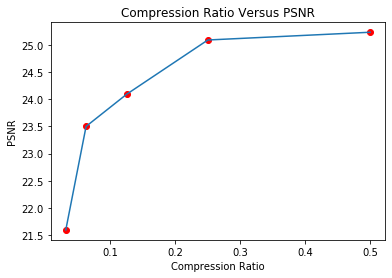

In [0]:
plt.plot(comp_ratio, comp_ratio_psnr,'ro')
plt.plot(comp_ratio, comp_ratio_psnr)
plt.xlabel('Compression Ratio')
plt.ylabel('PSNR')
plt.title('Compression Ratio Versus PSNR')
plt.show()